## POSTTEST08
## Rausyanfikr Adi Karmayoga 
## 2009106020

In [378]:
# Import Library
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, optimizers, datasets, Sequential

- Dataset

In [382]:
# Load dataset milik Keras
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data(path="mnist.npz")

# Shape dari Train dan Test X
print('Train: X=%s, y=%s' % (x_train_raw.shape, y_train_raw.shape))
print('Test: X=%s, y=%s' % (x_test_raw.shape, y_test_raw.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [383]:
# Data Encoding
num_classes = 10
y_train = to_categorical(y_train_raw, num_classes)
y_test = to_categorical(y_test_raw, num_classes)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


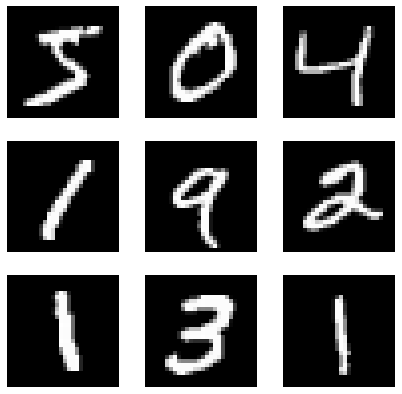

In [385]:
# Preview gambar dataset Mnist
plt.figure(figsize=(7,7))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train_raw[i],cmap='gray')
  plt.axis('off')

plt.show()

In [386]:
# Reshape gambar
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

# Scaling gambar
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

- Menggunakan model <b>Sequential</b>

In [388]:
model = Sequential()

# Input Layer
model.add(Dense(512,activation='relu',input_dim=784))

# Hidden Layer
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_280 (Dense)           (None, 512)               401920    
                                                                 
 dense_281 (Dense)           (None, 256)               131328    
                                                                 
 dense_282 (Dense)           (None, 128)               32896     
                                                                 
 dense_283 (Dense)           (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [390]:
# Compile model
Optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Optimizer, metrics=['accuracy'])

- Minimal akurasi training 70% dan validation 70%

In [391]:
# Training model
model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 7s 15ms/step - loss: 0.5628 - accuracy: 0.8595 - val_loss: 0.2237 - val_accuracy: 0.9361
Epoch 2/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1965 - accuracy: 0.9438 - val_loss: 0.1618 - val_accuracy: 0.9543
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1460 - accuracy: 0.9579 - val_loss: 0.1328 - val_accuracy: 0.9612
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1162 - accuracy: 0.9668 - val_loss: 0.1197 - val_accuracy: 0.9640
Epoch 5/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0954 - accuracy: 0.9726 - val_loss: 0.1054 - val_accuracy: 0.9686
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0804 - accuracy: 0.9766 - val_loss: 0.0866 - val_accuracy: 0.9732
Epoch 7/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0676 - accuracy: 0.9809 - val_loss: 0.0803 - val_accuracy: 0.9751

In [392]:
# Evaluasi model
score = model.evaluate(x_test,y_test,verbose=1)
print(f'Test Loss    : {score[0]}')
print(f'Test Akurasi : {round(score[1] * 100,2)} %')

313/313 [==============================] - 1s 4ms/step - loss: 0.0757 - accuracy: 0.9757
Test Loss    : 0.07570226490497589
Test Akurasi : 97.57 %


- Prediksi Model

In [399]:
predictions  = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


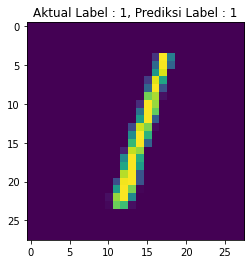

In [397]:
label = np.argmax(predictions,axis=1)
ActualLabel = np.argmax(y_test[2])
img = x_test[2].reshape(28, 28)

plt.title(f"Aktual Label : {ActualLabel}, Prediksi Label : {label[2]}")
plt.imshow(img)
plt.show()

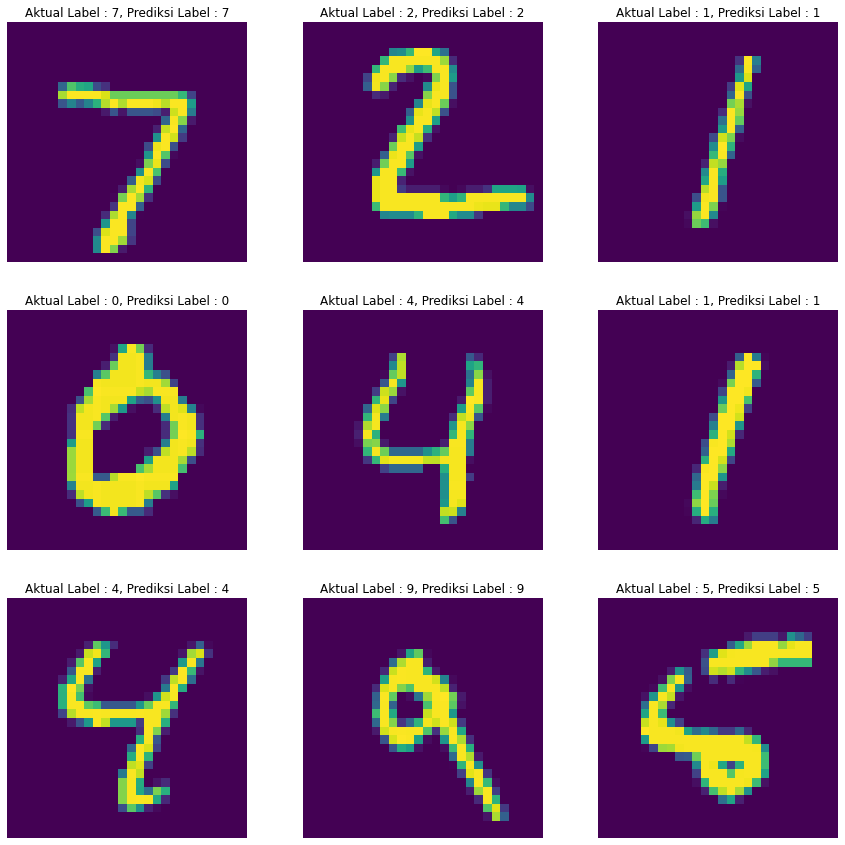

In [398]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  ActualLabel = np.argmax(y_test[i])

  plt.title(f"Aktual Label : {ActualLabel}, Prediksi Label : {label[i]}")
  plt.imshow(x_test[i].reshape(28, 28))
  plt.axis('off')

plt.show()